**Diana Covaci, 261 086 280**


**Nicholas Milin, 261 106 314**

# Task 1: Acquire, preprocess, and analyze the data

In [2]:
!pip install -q numpy pandas matplotlib seaborn scikit-learn ucimlrepo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from IPython.core.debugger import set_trace
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Loading the Datasets

In [3]:
parkinsons_telemonitoring = fetch_ucirepo(id=189)
# descriptions = parkinsons_telemonitoring.variables.description
# for description in descriptions:
#   print(description)
print(parkinsons_telemonitoring.metadata.additional_info.summary)
print(parkinsons_telemonitoring.metadata.intro_paper)

This dataset is composed of a range of biomedical voice measurements from 42 people with early-stage Parkinson's disease recruited to a six-month trial of a telemonitoring device for remote symptom progression monitoring. The recordings were automatically captured in the patient's homes.

Columns in the table contain subject number, subject age, subject gender, time interval from baseline recruitment date, motor UPDRS, total UPDRS, and 16 biomedical voice measures. Each row corresponds to one of 5,875 voice recording from these individuals. The main aim of the data is to predict the motor and total UPDRS scores ('motor_UPDRS' and 'total_UPDRS') from the 16 voice measures.

The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. There are around 200 recordings per patient, the subject number of the patient is identified in the first column. For further information or to pass on comments, please contact Athanasios Tsanas (tsanas

In [42]:
# Step 1 -- Load the datasets

# Fetch Dataset 1 -- Parkinsons Telemonitoring dataset
parkinsons_telemonitoring = fetch_ucirepo(id=189)
PT_X = parkinsons_telemonitoring.data.features
PT_y = parkinsons_telemonitoring.data.targets

# Fetch Dataset 2 -- Breast Cancer Diagnostic dataset
breast_cancer_diagnostic = fetch_ucirepo(id=17)
BCD_X = breast_cancer_diagnostic.data.features
BCD_y = breast_cancer_diagnostic.data.targets

# Loadeing verification
print(f"The Parkinsons Telemonitoring dataset has {PT_X.shape[0]} samples/rows and {PT_X.shape[1]} features/columns.")
print(f"\nThe Breast Cancer dataset has {BCD_X.shape[0]} samples/rows and {BCD_X.shape[1]} features/columns.")

The Parkinsons Telemonitoring dataset has 5875 samples/rows and 19 features/columns.

The Breast Cancer dataset has 569 samples/rows and 30 features/columns.


## Cleaning the data

--- 1. MISSING VALUES ---
Missing values in Parkinsons Telemonitoring dataset:
	In Features: 0
	In Targets: 0

Missing values in Breast Cancer Diagnostic dataset:
	In Features: 0
	In Targets: 0


--- 2. CORRELATION ---
Correlation between features and target in Parkinsons Telemonitoring dataset:
	In Features: DFA             NaN
HNR             NaN
Jitter(%)       NaN
Jitter(Abs)     NaN
Jitter:DDP      NaN
Jitter:PPQ5     NaN
Jitter:RAP      NaN
NHR             NaN
PPE             NaN
RPDE            NaN
Shimmer         NaN
Shimmer(dB)     NaN
Shimmer:APQ11   NaN
Shimmer:APQ3    NaN
Shimmer:APQ5    NaN
Shimmer:DDA     NaN
age             NaN
motor_UPDRS     NaN
sex             NaN
test_time       NaN
total_UPDRS     NaN
dtype: float64


--- 2. COLUMN NAMES ---
Column names in Parkinsons Telemonitoring dataset:
	In Features: ['age', 'test_time', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ1

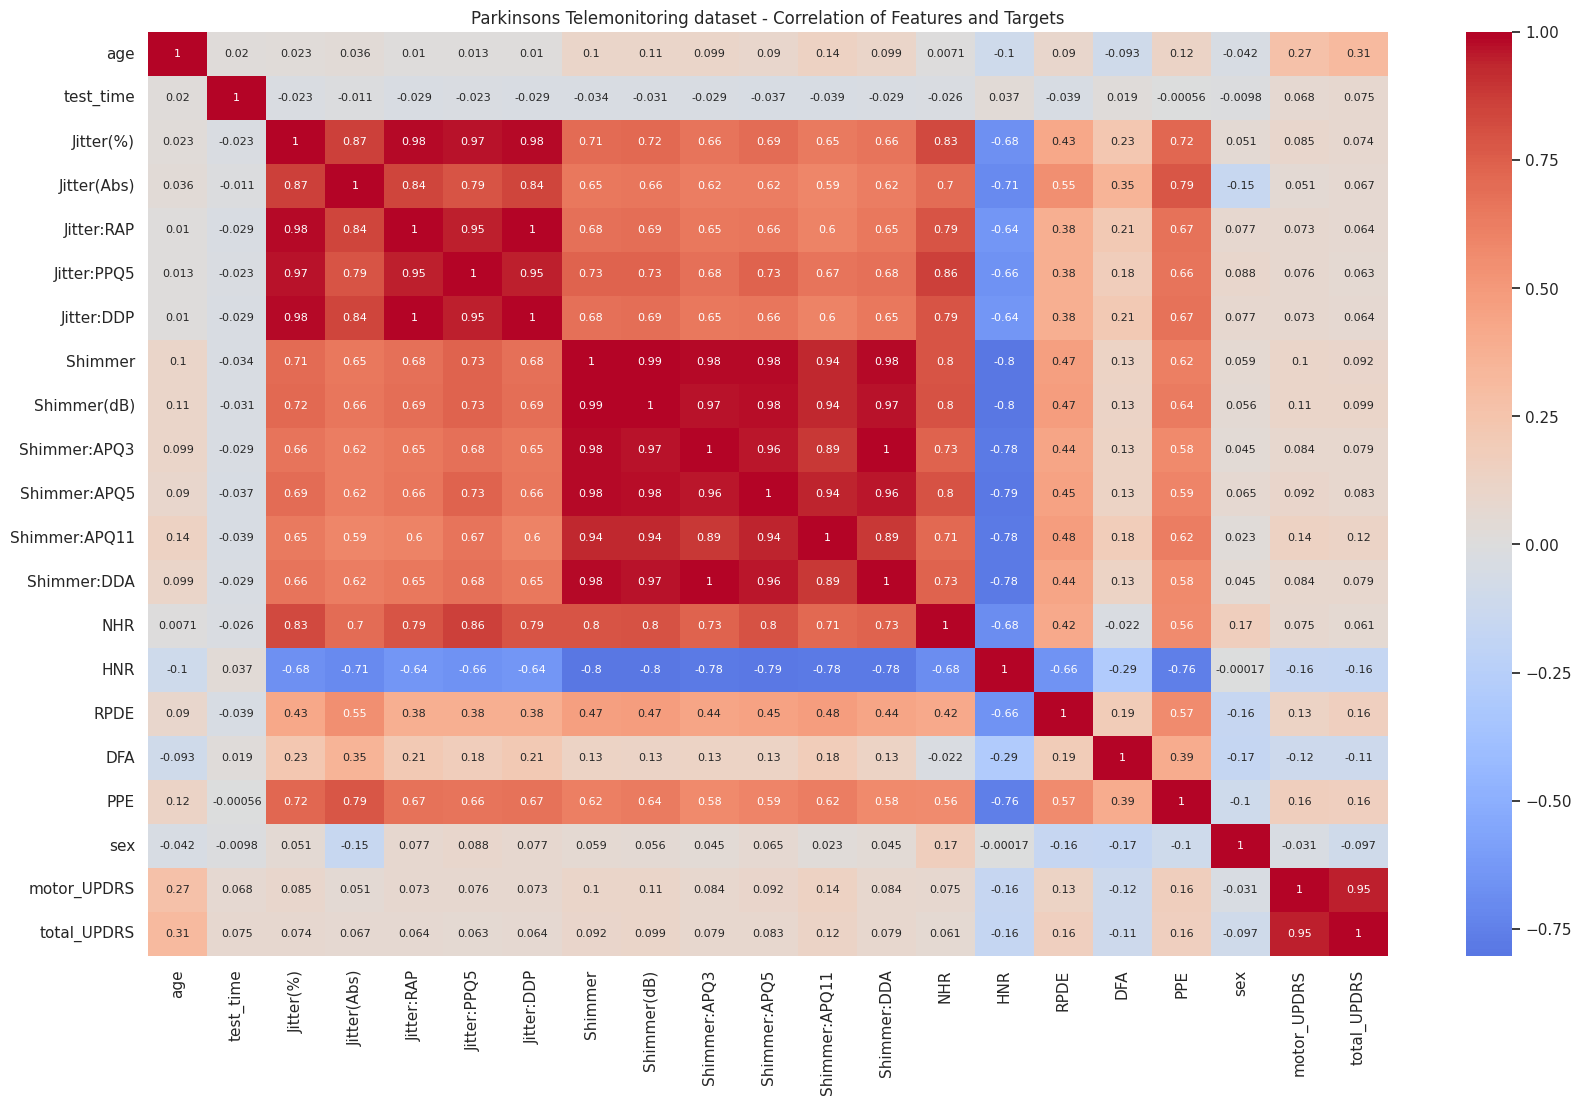

Correlation between features and target in Breast Cancer Diagnostic dataset:


Text(0.5, 1.0, 'Breast Cancer Diagnostic dataset - Correlation of Features with Target')

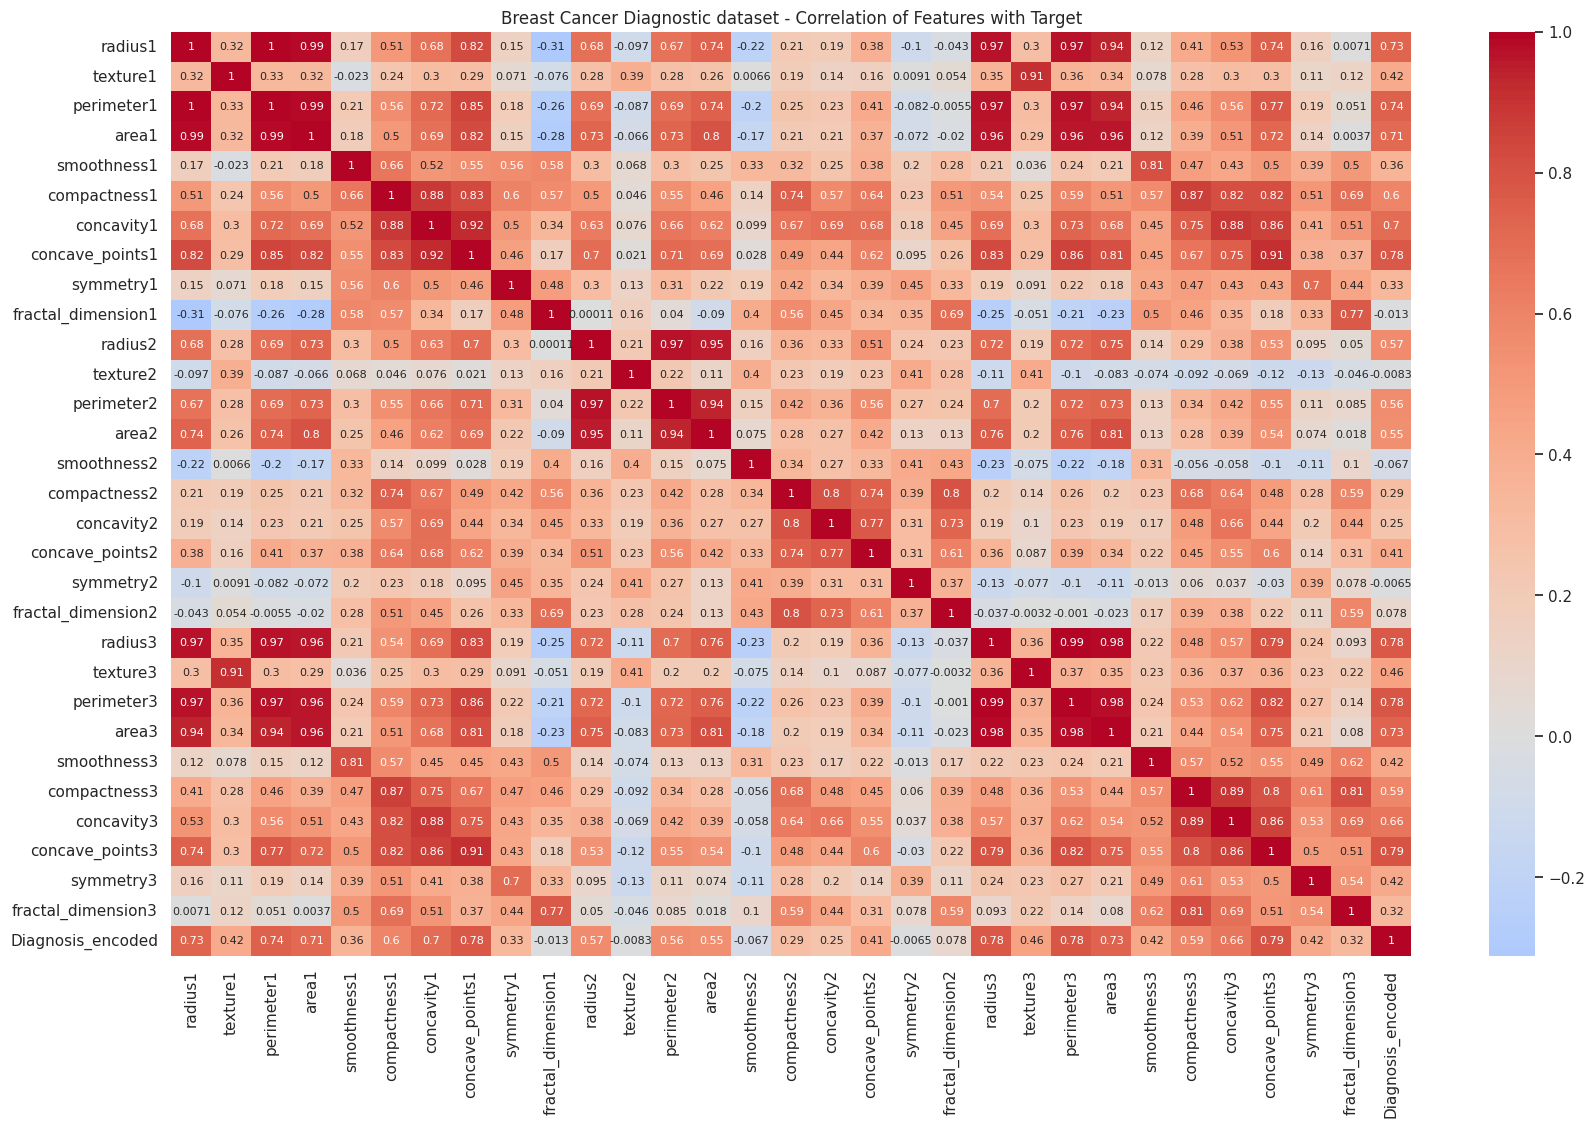

In [43]:
# Step 2 -- Clean the data

# 1. Check for missing values in both datasets
print("--- 1. MISSING VALUES ---")
print("Missing values in Parkinsons Telemonitoring dataset:")
print(f'\tIn Features: {PT_X.eq('?').sum().sum()}')
print(f'\tIn Targets: {PT_y.eq('?').sum().sum()}')
print("\nMissing values in Breast Cancer Diagnostic dataset:")
print(f'\tIn Features: {BCD_X.eq('?').sum().sum()}')
print(f'\tIn Targets: {BCD_y.eq('?').sum().sum()}')

# 2. Check for correlation between features and target
print("\n\n--- 2. CORRELATION ---")
print("Correlation between features and target in Parkinsons Telemonitoring dataset:")
print(f'\tIn Features: {PT_X.corrwith(PT_y).abs().sort_values(ascending=False)}')

# 2. Check columns and remove subject IDs
print("\n\n--- 2. COLUMN NAMES ---")
print("Column names in Parkinsons Telemonitoring dataset:")
print(f'\tIn Features: {PT_X.columns.tolist()}')
print(f'\tIn Targets: {PT_y.columns.tolist()}')
print("There are no subject ID columns to be removed.")

print("\nColumn names in Breast Cancer Diagnostic dataset:")
print(f'\tIn Features: {BCD_X.columns.tolist()}')
print(f'\tIn Targets: {BCD_y.columns.tolist()}')
print("There are no subject ID columns to be removed.")

# 3. Check for duplicate entries in the features frames
print("\n\n--- 3. DUPLICATE ENTRIES ---")
print(f'In the Parkisons Telemonitoring dataset: {PT_X.duplicated().sum()}')
print(f'In the Breast Cancer Diagnostic dataset: {BCD_X.duplicated().sum()}')
print("There are no duplicated entries to be removed.")

# 4. Check for categorical variables that need to be encoded
print("\n\n--- 4. CATEGORICAL VARIABLES ---")
print("Categorical variables in Parkinsons Telemonitoring dataset:")
print(f'\tIn Features: {PT_X.select_dtypes(include=['object']).columns.tolist()}')
print(f'\tIn Targets: {PT_y.select_dtypes(include=['object']).columns.tolist()}')
print("\nCategorical variables in Breast Cancer Diagnostic dataset:")
print(f'\tIn Features: {BCD_X.select_dtypes(include=['object']).columns.tolist()}')
print(f'\tIn Targets: {BCD_y.select_dtypes(include=['object']).columns.tolist()}')

# we see that the 'Diagnosis' column in the targets for dataset 2 is categorical
# we will encode this variable where 0 = Benign, 1 = Malignant
BCD_y_encoded = BCD_y['Diagnosis'].map({'B':0, 'M':1})
BCD_y_encoded.name = 'Diagnosis_encoded'
print("\nWe will encode the categorical 'Diagnosis' variable where 0 = Benign, 1 = Malignant")

# 5. Scale Features
print("\n\n--- 5. SCALE FEATURES ---")
scaler_pt = StandardScaler()
PT_X_scaled = pd.DataFrame(scaler_pt.fit_transform(PT_X), columns=PT_X.columns, index=PT_X.index)

scaler_bcd = StandardScaler()
BCD_X_scaled = pd.DataFrame(scaler_bcd.fit_transform(BCD_X), columns=BCD_X.columns, index=BCD_X.index)
print("Features for both datasets have been scaled using Standard Scaler from scikit-learn.")

print('\n\n--- Cleaning, encoding and scaling of the data is complete. ---')
PT_X = PT_X_scaled
BCD_X = BCD_X_scaled
BCD_y = BCD_y_encoded

## Computing Basic Statstics on Parkinsons Dataset

--- Statistics on the Parkinsons Telemonitoring Dataset ---

Statistical values of key features:


,age,Jitter(%),Shimmer(dB),HNR,RPDE
min,-3.265580e+00,-9.466570e-01,-1.237697e+00,-4.665987e+00,-3.866744e+00
max,2.289489e+00,1.668571e+01,7.800931e+00,3.774533e+00,4.204980e+00
mean,-4.063700e-16,1.451321e-16,1.838340e-16,-6.385814e-16,1.935095e-16
std,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00



Statistical values of targets:


,motor_UPDRS,total_UPDRS
min,5.037700,7.000000
max,39.511000,54.992000
mean,21.296229,29.018942
std,8.129282,10.700283



Top 5 features with highest correlation to motor_UPDRS (target):


,0
age,0.273665
PPE,0.162433
HNR,0.157029
Shimmer:APQ11,0.136560
RPDE,0.128607



Top 5 features with highest correlation to total_UPDRS (target):


,0
age,0.310290
HNR,0.162117
RPDE,0.156897
PPE,0.156195
Shimmer:APQ11,0.120838


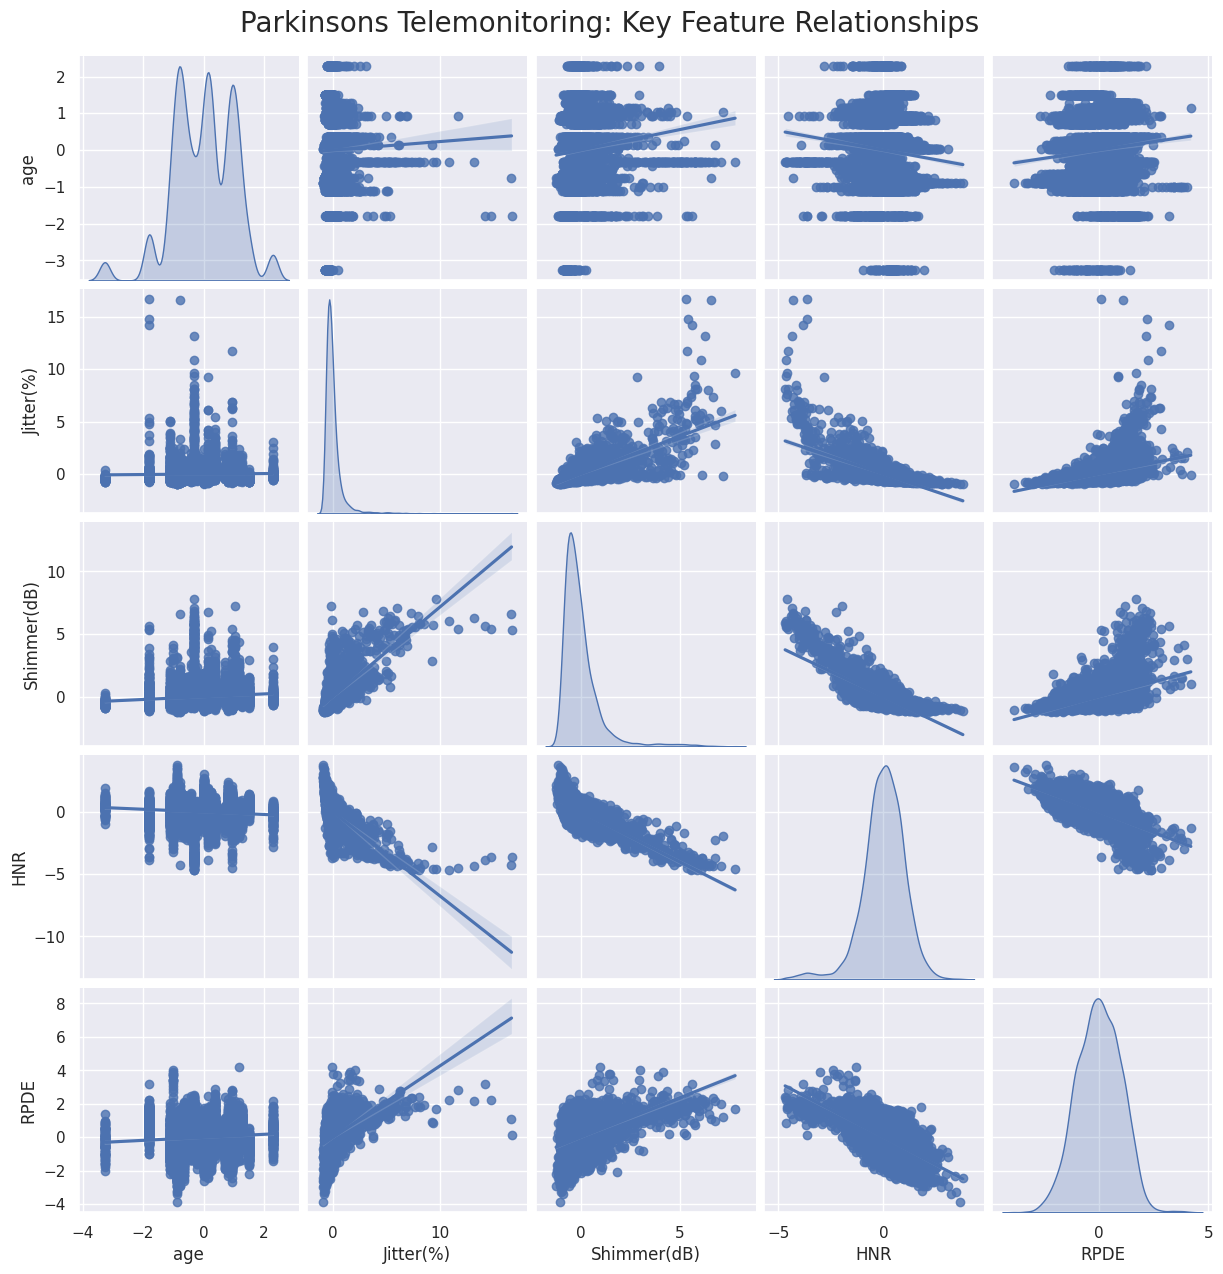


 Correlation heat maps: 

Correlation between features and target in Parkinsons Telemonitoring dataset:


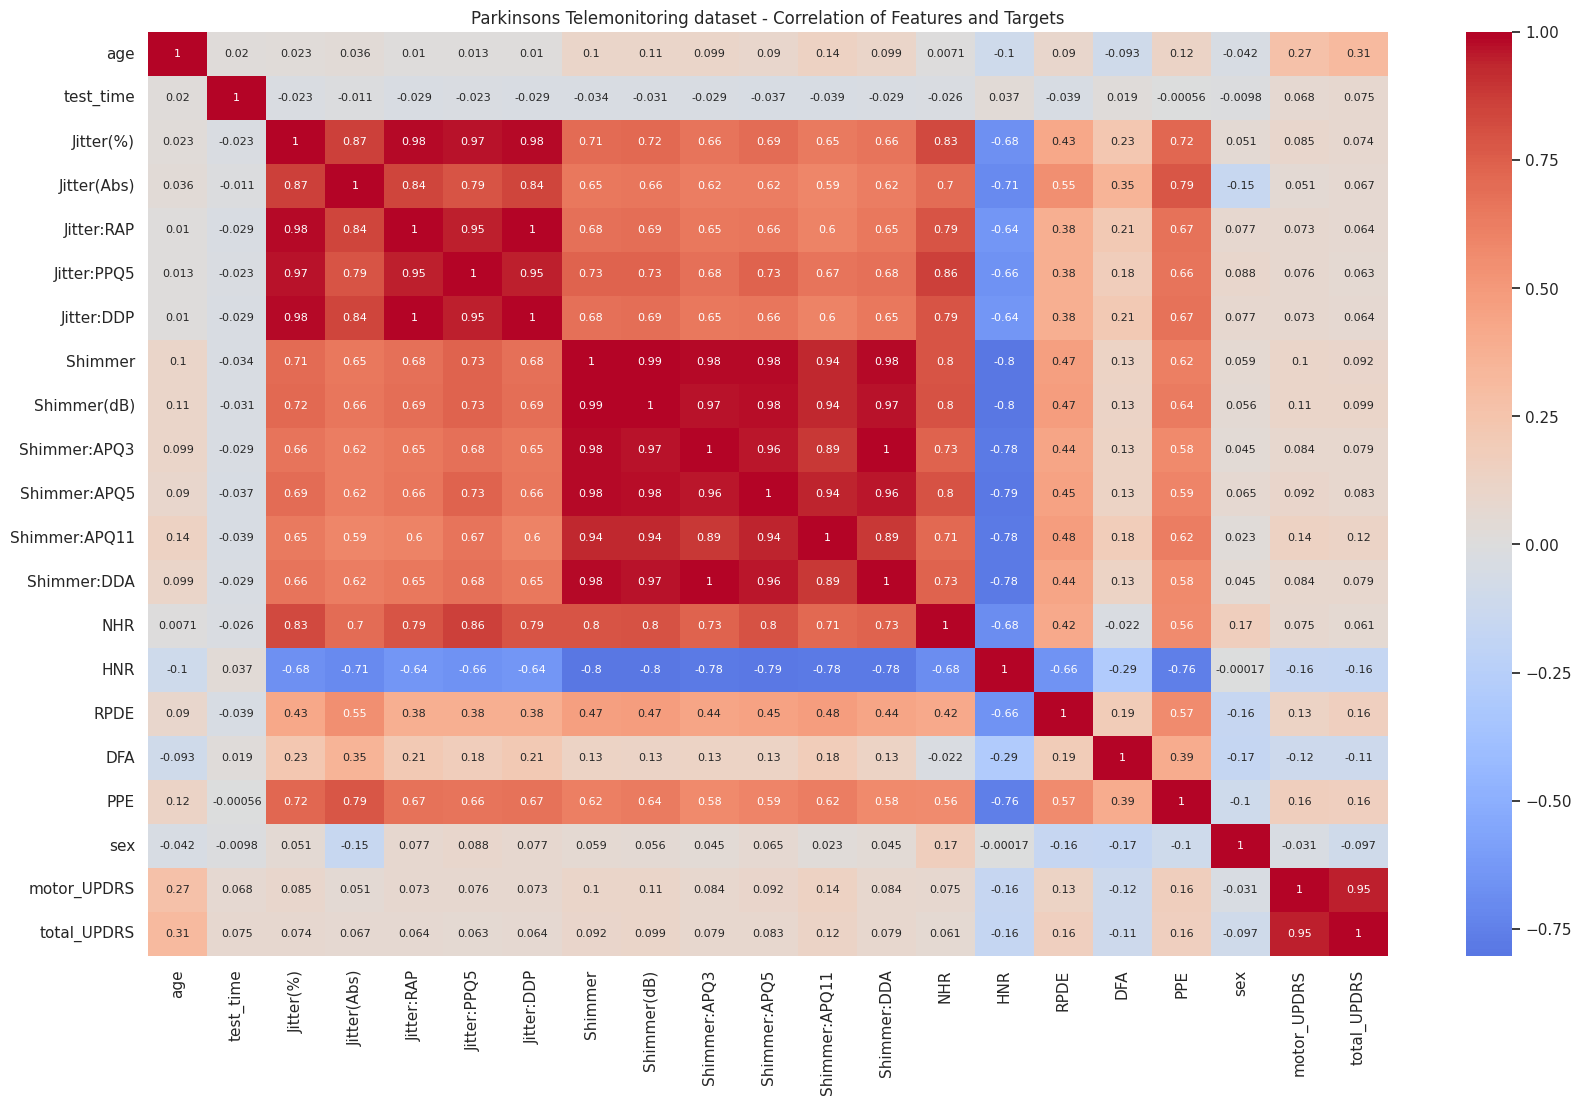

Correlation between features and target in Breast Cancer Diagnostic dataset:


Text(0.5, 1.0, 'Breast Cancer Diagnostic dataset - Correlation of Features with Target')

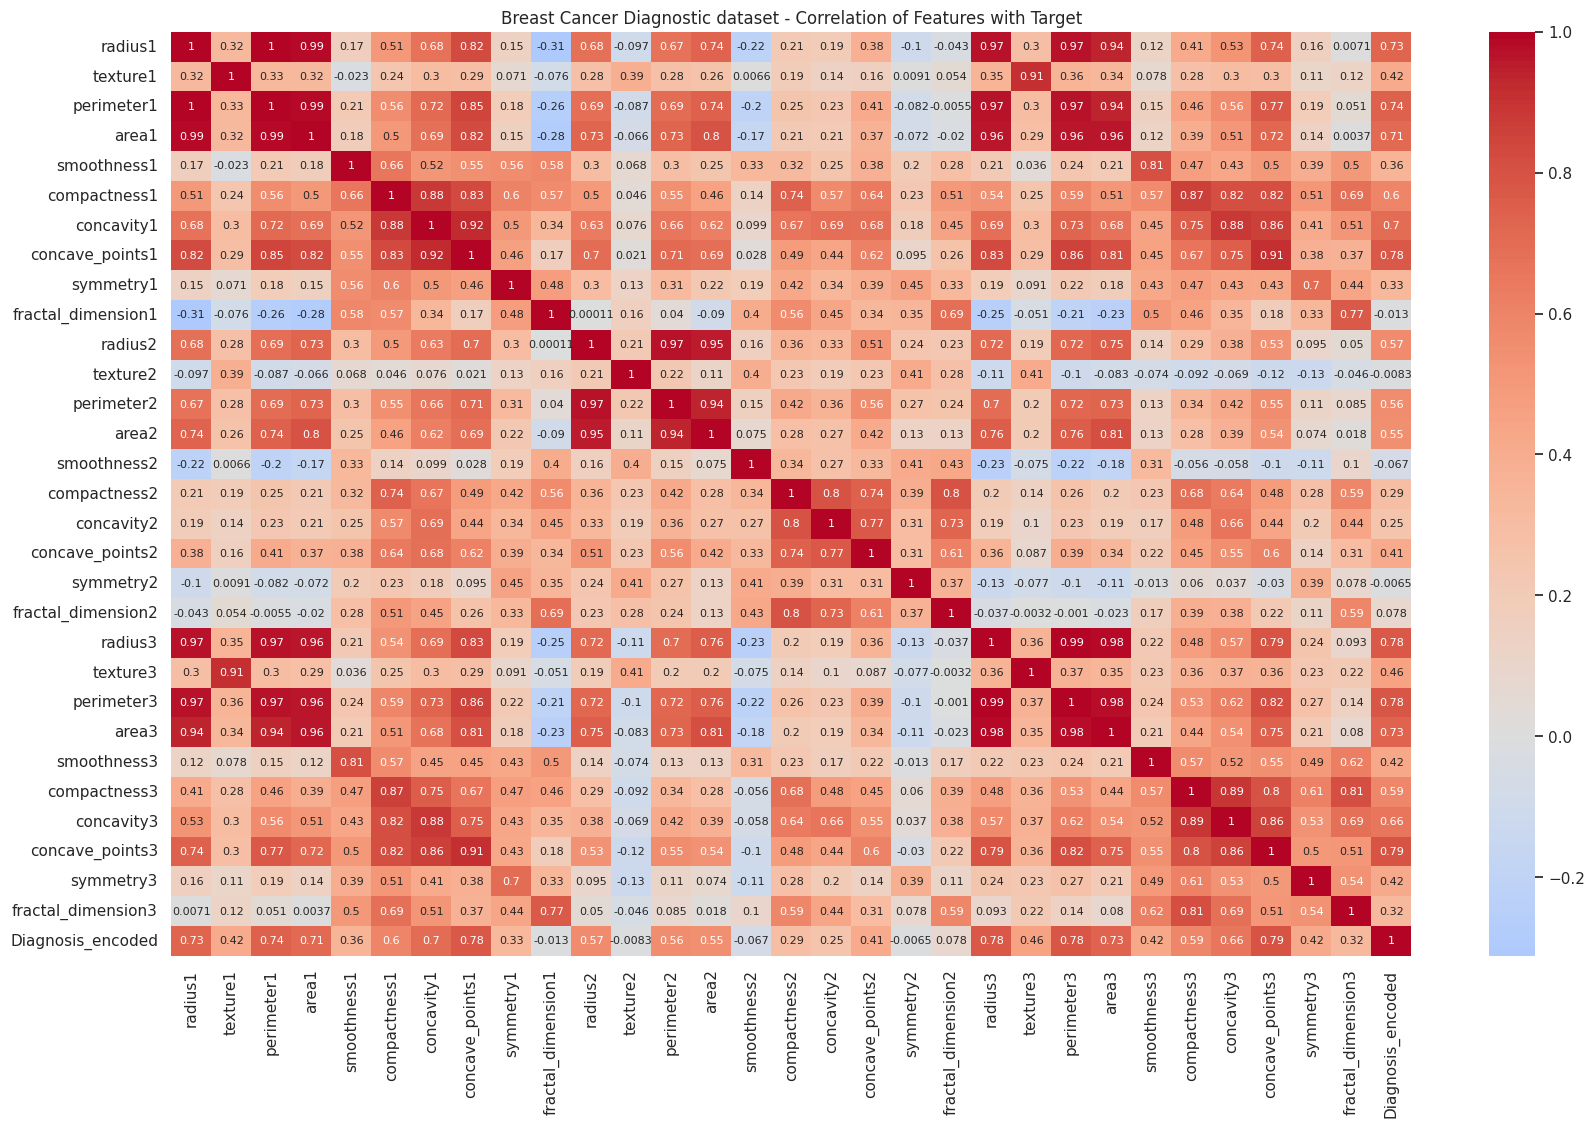

In [45]:
# Step 3A -- Compute basic statistics on the Parkinsons Telemonitoring Dataset
print("--- Statistics on the Parkinsons Telemonitoring Dataset ---")

# Find statistical values of key features and target in the dataset
print("\nStatistical values of key features:")
key_features_pt = ['age', 'Jitter(%)', 'Shimmer(dB)', 'HNR', 'RPDE']
display(PT_X[key_features_pt].describe().loc[['min', 'max', 'mean', 'std']])
print("\nStatistical values of targets:")
display(PT_y.describe().loc[['min', 'max', 'mean', 'std']])

# Calculate what features have a high correlation with the motor_UPDRS target column
correlations = PT_X.corrwith(PT_y['motor_UPDRS']).abs().sort_values(ascending=False)
print("\nTop 5 features with highest correlation to motor_UPDRS (target):")
display(correlations.head(5))

# Calculate what features have a high correlation with the total_UPDRS target column
correlations = PT_X.corrwith(PT_y['total_UPDRS']).abs().sort_values(ascending=False)
print("\nTop 5 features with highest correlation to total_UPDRS (target):")
display(correlations.head(5))

# Visualize relations and trends between key features
#print("\nRelations between key features:")
#kind = 'reg': add linear trend lines
#diag_kind = 'kde' : show density plots for each predictor in diagonal panels.
sns.pairplot(PT_X[key_features_pt], kind = 'reg', diag_kind='kde')
plt.suptitle('Parkinsons Telemonitoring: Key Feature Relationships', y=1.02, fontsize=20)
plt.show()

print("\n Correlation heat maps: ")
print("\nCorrelation between features and target in Parkinsons Telemonitoring dataset:")

PT_df = pd.concat([PT_X, PT_y], axis=1)
PT_corr_matrix = PT_df.corr()
# Keep only correlations with targets and plot heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(PT_corr_matrix, annot=True, cmap='coolwarm', center=0, annot_kws={'size':8})
plt.title("Parkinsons Telemonitoring dataset - Correlation of Features and Targets")
plt.show()

print("Correlation between features and target in Breast Cancer Diagnostic dataset:")
BCD_df = pd.concat([BCD_X, BCD_y], axis=1)
BCD_corr_matrix = BCD_df.corr()
# Keep only correlations with targets and plot heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(BCD_corr_matrix, annot=True, cmap='coolwarm', center=0, annot_kws={'size':8})
plt.title("Breast Cancer Diagnostic dataset - Correlation of Features with Target")

## Computing Basic Statstics on Breast Cancer Dataset

--- Statistics on the Breast Cancer Diagnostic Dataset ---

Statistical values of key features:


,radius1,texture2,perimeter3,area2,smoothness1
min,-2.029648e+00,-1.554264e+00,-1.693361e+00,-7.378291e-01,-3.112085e+00
max,3.971288e+00,6.655279e+00,4.287337e+00,1.104184e+01,4.770911e+00
mean,-1.373633e-16,-1.123881e-16,-3.746271e-16,-1.311195e-16,-8.366672e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00



Distribution of Diagnosis (target):
	*Encoding: 0->Benign, 1->Malignant


,count
Diagnosis_encoded,
0,357
1,212



Top 5 features with highest difference in mean between malignant and benign samples:


,0
concave_points3,1.641320
perimeter3,1.619289
concave_points1,1.606258
radius3,1.605927
perimeter1,1.535981



Relations between key features:


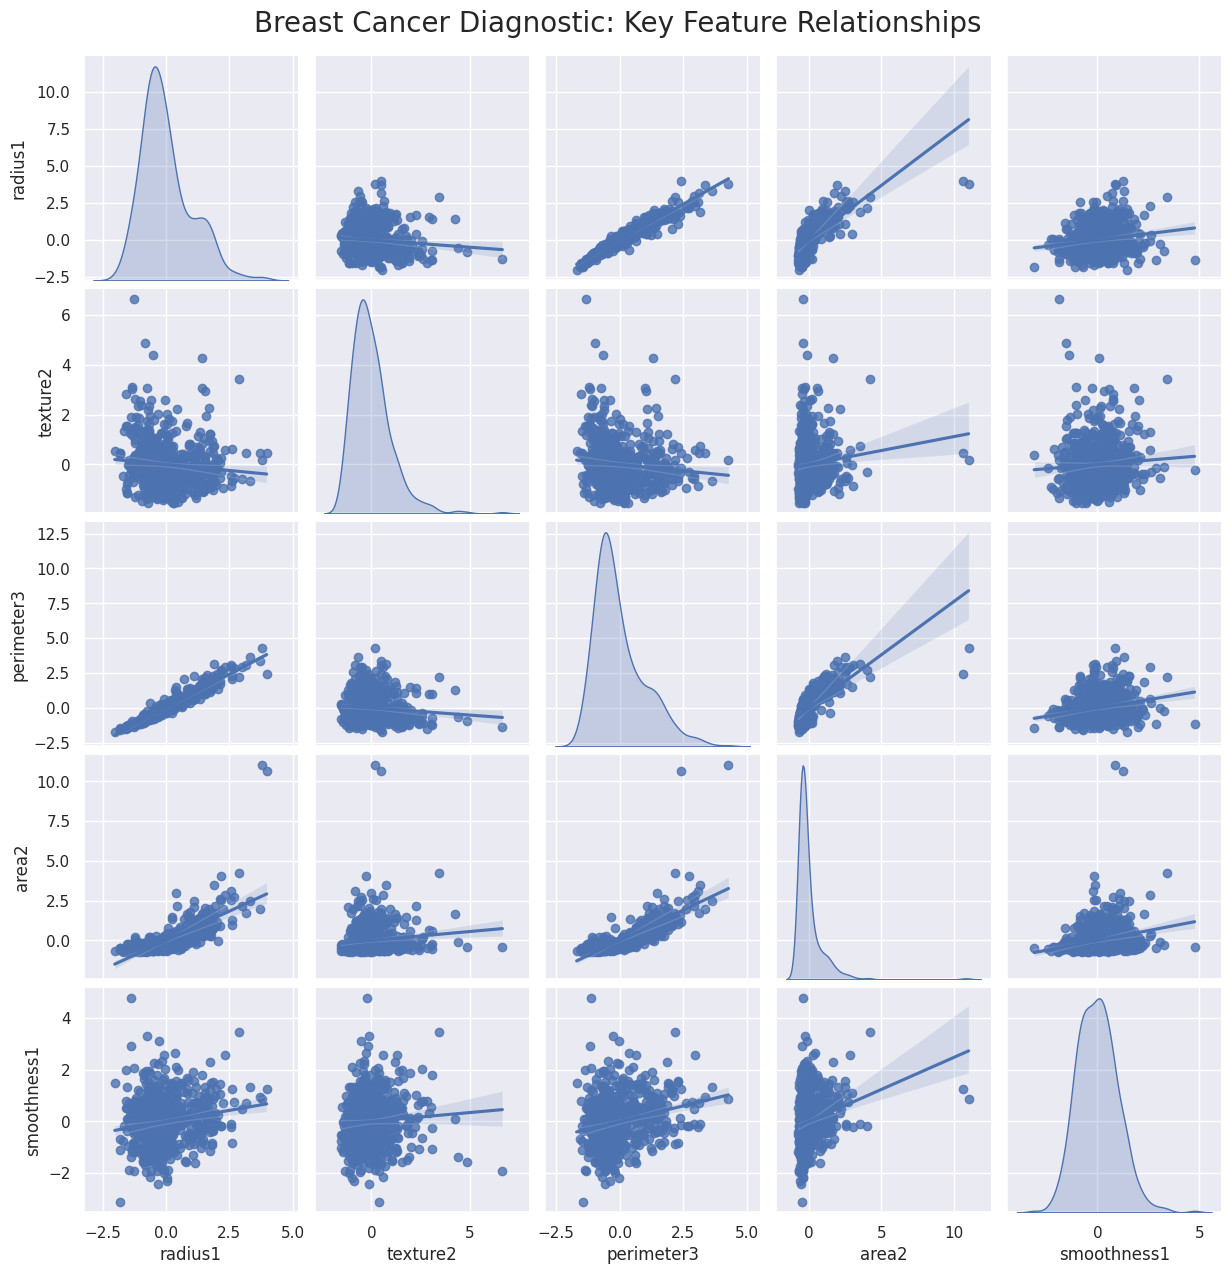

In [ ]:
# Step 3B -- Compute basic statistics on the Breast Cancer Diagnostic Dataset
print("--- Statistics on the Breast Cancer Diagnostic Dataset ---")

# Find statistical values of key features and target in the dataset
print("\nStatistical values of key features:")
key_features_bcd = ['radius1', 'texture2', 'perimeter3', 'area2', 'smoothness1' ]
display(BCD_X[key_features_bcd].describe().loc[['min', 'max', 'mean', 'std']])
print("\nDistribution of Diagnosis (target):")
print('\t*Encoding: 0->Benign, 1->Malignant')
display(BCD_y.value_counts())

# Calculate what features have the largest mean difference between M and B
malignant_means = BCD_X[BCD_y == 1].mean()
benign_means = BCD_X[BCD_y == 0].mean()
mean_diff = (malignant_means - benign_means).abs().sort_values(ascending=False)
print("\nTop 5 features with highest difference in mean between malignant and benign samples:")
display(mean_diff.head(5))


# Visualize relations and trends between key features
print("\nRelations between key features:")
sns.pairplot(BCD_X[key_features_bcd], kind = 'reg', diag_kind='kde')
plt.suptitle('Breast Cancer Diagnostic: Key Feature Relationships', y=1.02, fontsize=20)
plt.show()

# Task 2: Implement the models

##Linear Regression

In [ ]:
# Implement analytical linear regression. To be used for Dataset 1
class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass

    # Gradient of the cost function
    def gradient(self, x, y, w):
        N, D = x.shape
        y_pred = np.dot(x, w)
        grad = np.dot(x.T, (y_pred - y))/N
        return grad

    def fit(self, x, y, optimizer = None):
        if x.ndim == 1:
            x = x[:, None]                         #add a dimension for the features

        if self.add_bias:
            x = np.column_stack([x,np.ones(x.shape[0])])    #add bias by adding a constant feature of value 1

        N,D = x.shape

        if optimizer is None:
            # analytical solution using the normal equations
            xtx = np.dot(x.T, x)
            xtx_inv = np.linalg.inv(xtx)
            xty = np.dot(x.T, y)
            self.w = np.dot(xtx_inv, xty)
            #self.w = np.linalg.lstsq(x, y)[0]          #return w for the least square difference
        else:
            w0 = np.zeros((D, y.shape[1]))                                # initialize the weights to 0
            self.w = optimizer.run(self.gradient, x, y, w0)      # run the optimizer to get the optimal weights
        return self

    def predict(self, x, w = None):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            x = np.column_stack([x,np.ones(x.shape[0])])

        if w is None:
            y_pred = x@self.w
        else:
            y_pred = x@w

        return y_pred

    # This is the cost function
    # Compute the mean squared error since the sum is effected by number of data points
    def meanSquareErrorLoss(self, y_true, y_pred):
        y_true = np.asarray(y_true)
        y_pred = np.asarray(y_pred)
        return np.mean(0.5 * (y_true - y_pred)**2, axis=0)

##Logistic Regression

In [ ]:
# Implement logistic regression with gradient descent. To be used for Dataset 2
logistic = lambda z:1./ (1 + np.exp(-z))

class LogisticRegression:

    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e5, verbose=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon                        #to get the tolerance for the norm of gradients
        self.max_iters = max_iters                    #maximum number of iteration of gradient descent
        self.verbose = verbose
        self.w = None # Initialize weights to None

    def gradient(self, x, y, w):
        N,D = x.shape
        yh = logistic(np.dot(x, w))    # predictions  size N
        grad = np.dot(x.T, yh - y)/N        # divide by N because cost is mean over N points
        return grad                         # size D

    # Optimizer is Gradient Descent or Mini-batch SGD
    def fit(self, x, y, optimizer):
        if x.ndim == 1:
            x = x[:, None]

        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])


        N,D = x.shape
        self.w = np.zeros(D)

        self.w = optimizer.run(self.gradient, x, y, self.w)

        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        return self

    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]

        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
        yh = logistic(np.dot(x,self.w))            #predict output
        return yh

    # This is the cost function
    def cost_fn(self, x, y):
        if x.ndim == 1:
            x = x[:, None]

        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        #N, D = x.shape
        z = np.dot(x, self.w)
        J = np.mean(y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z))) #log1p calculates log(1+x) to remove floating point inaccuracies
        return J

## Gradient Descent

In [ ]:
class GradientDescent:

    def __init__(self, learning_rate=.1, max_iters=1e4, epsilon=1e-8, record_history=False):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        if record_history:
            self.w_history = []                 #to store the weight history for visualization

    def run(self, gradient_fn, x, y, w):
        grad = np.inf
        t = 1
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
            grad = gradient_fn(x, y, w)               # compute the gradient with present weight

            if self.record_history:
                self.w_history.append(w)

            w = w - self.learning_rate * grad         # weight update step

            t += 1
        return w

##Mini-batch Stochastic Gradient Descent

In [ ]:
class Mini_Batch_SGD:

    def __init__(self, learning_rate=.001, max_iters=1000, epsilon=1e-8, batch_size=None, record_history=False ):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.epsilon = epsilon
        self.batch_size = batch_size
        self.record_history = record_history
        if record_history:
            self.w_history = []

    def run(self, gradient_fn, x, y, w):
        N, D = x.shape
        grad = np.inf
        t = 1

        if self.batch_size is None:
            batch_size = N
        else:
            batch_size = self.batch_size

        # Convert DataFrame to numpy array if needed
        if isinstance(x, pd.DataFrame):
            x = x.values
        if isinstance(y, pd.DataFrame):
            y = y.values

        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
            # Random permutation of indices
            indices = np.random.permutation(N)
            x_shuffled = x[indices]
            y_shuffled = y[indices]

            for i in range(0, N, batch_size):
                x_batch = x_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]

                # Compute gradient on current mini-batch
                grad = gradient_fn(x_batch, y_batch, w)
                # print("grad:", grad)

                if self.record_history:
                    self.w_history.append(w)

                # Update weights - now handles multiple outputs correctly
                w = w - self.learning_rate * grad

                t += 1
                if np.linalg.norm(grad) <= self.epsilon or t >= self.max_iters:
                    break

        return w



---



# Task 3: Run experiments


## Experiment 1 - Performance on 80/20 train/test split

In [ ]:
# Experiment 1
print("--- EXPERIMENT 1 ---")
print("\nTASK: Report the performance of linear regression and fully batched logistic regression. For both \ndatasets use a 80/20 train/test split and report the performance on both training set and test set.")

# PART A - Use Linear Regression on the Parkinsons Telemonitoring dataset

print("\n\nA. Linear Regression on the Parksinsons Telemonitoring dataset.")
# Split the data
X_train, X_test, y_train, y_test = train_test_split(PT_X, PT_y, test_size=0.2, random_state=42)
pt_model = LinearRegression()
# Train the model on the training data
pt_model.fit(X_train.values, y_train.values)

# Report performance on Training set
y_train_pred = pt_model.predict(X_train)
mse_train = pt_model.meanSquareErrorLoss(y_train, y_train_pred)

# Calculate R-squared for training set (motor_UPDRS)
ss_total_train_motor = ((y_train['motor_UPDRS'] - y_train['motor_UPDRS'].mean()) ** 2).sum()
ss_residual_train_motor = ((y_train['motor_UPDRS'] - y_train_pred[:, 0]) ** 2).sum()
r_squared_train_motor = 1 - (ss_residual_train_motor / ss_total_train_motor) if ss_total_train_motor != 0 else float('nan')

# Calculate R-squared for training set (total_UPDRS)
ss_total_train_total = ((y_train['total_UPDRS'] - y_train['total_UPDRS'].mean()) ** 2).sum()
ss_residual_train_total = ((y_train['total_UPDRS'] - y_train_pred[:, 1]) ** 2).sum()
r_squared_train_total = 1 - (ss_residual_train_total / ss_total_train_total) if ss_total_train_total != 0 else float('nan')


print("\nTrain Set Performance: ")
print("motor_UPDRS MSE:", round(mse_train[0], 6))
print("motor_UPDRS R-squared:", round(r_squared_train_motor, 6))
print("total_UPDRS MSE:", round(mse_train[1], 6))
print("total_UPDRS R-squared:", round(r_squared_train_total, 6))


# Report performance on Test set
y_test_pred = pt_model.predict(X_test)
mse_test = pt_model.meanSquareErrorLoss(y_test, y_test_pred)

# Calculate R-squared for test set (motor_UPDRS)
ss_total_test_motor = ((y_test['motor_UPDRS'] - y_test['motor_UPDRS'].mean()) ** 2).sum()
ss_residual_test_motor = ((y_test['motor_UPDRS'] - y_test_pred[:, 0]) ** 2).sum()
r_squared_test_motor = 1 - (ss_residual_test_motor / ss_total_test_motor) if ss_total_test_motor != 0 else float('nan')

# Calculate R-squared for test set (total_UPDRS)
ss_total_test_total = ((y_test['total_UPDRS'] - y_test['total_UPDRS'].mean()) ** 2).sum()
ss_residual_test_total = ((y_test['total_UPDRS'] - y_test_pred[:, 1]) ** 2).sum()
r_squared_test_total = 1 - (ss_residual_test_total / ss_total_test_total) if ss_total_test_total != 0 else float('nan')

print("\nTest Set Performance:")
print("motor_UPDRS MSE:", round(mse_test[0], 6))
print("motor_UPDRS R-squared:", round(r_squared_test_motor, 6))
print("total_UPDRS MSE:", round(mse_test[1], 6))
print("total_UPDRS R-squared:", round(r_squared_test_total, 6))



# --------------------------

# PART B - Use Logistic Regression on the Breast Cancer Diagnostic dataset

print("\n\nB. Logistic Regression on the Breast Cancer Diagnostic dataset.")
# Split the data
X_train, X_test, y_train, y_test = train_test_split(BCD_X, BCD_y, test_size=0.2, random_state=42)
optimizer = GradientDescent()
bcd_model = LogisticRegression()
# Train the model on the training data
bcd_model.fit(X_train, y_train, optimizer)

# Report performance on Training set
cost_train = bcd_model.cost_fn(X_train, y_train) # Pass X_train and y_train to cost_fn
print("\nTraining Set Performance:") # Corrected print statement
print("Cost:", round(cost_train, 6))

# Report performance on Test set
cost_test = bcd_model.cost_fn(X_test, y_test) # Pass X_test and y_test to cost_fn
print("\nTest Set Performance")
print("Cost:", round(cost_test, 6))

--- EXPERIEMENT 1 ---

TASK: Report the performance of linear regression and fully batched logistic regression. For both 
datasets use a 80/20 train/test split and report the performance on both training set and test set.


A. Linear Regression on the Parksinsons Telemonitoring dataset.

Train Set Performance: 
motor_UPDRS MSE: 27.866058
motor_UPDRS R-squared: 0.16354
total_UPDRS MSE: 47.311119
total_UPDRS R-squared: 0.179879

Test Set Performance:
motor_UPDRS MSE: 28.006974
motor_UPDRS R-squared: 0.12244
total_UPDRS MSE: 46.653193
total_UPDRS R-squared: 0.157984


B. Logistic Regression on the Breast Cancer Diagnostic dataset.

Training Set Performance:
Cost: 0.043232

Test Set Performance
Cost: 0.061617


## Experiment 2 - Weights of each of features

In [ ]:
# Experiment 2
print("--- EXPERIMENT 2 ---")
print("\nTASK: Report the weights of each of features in your trained models and discuss how each feature could affect the performance of the models.")


# PART A - Report the weights from Linear Regression on the Parkinsons Telemonitoring dataset
print("\n\nA. Weights from the Linear Regression model on the Parksinsons Telemonitoring dataset.")
pt_feats = list(PT_X.columns) + ["Bias"] if pt_model.add_bias else list(PT_X.columns)
pt_targs = list(PT_y.columns)
pt_weights_df = pd.DataFrame(pt_model.w, index=pt_feats, columns=pt_targs)
display(pt_weights_df)

# --------------------------

# PART B - Report the weights from Logistic Regression on the Breast Cancer Diagnostic dataset
print("\n\nB. Weights from the Logistic Regression model on the Breast Cancer Diagnostic dataset.")
bcd_feats = list(BCD_X.columns) + ["Bias"] if bcd_model.add_bias else list(BCD_X.columns)
bcd_targs = [BCD_y.name]
bcd_weights_df = pd.DataFrame(bcd_model.w, index=bcd_feats, columns=bcd_targs)
display(bcd_weights_df)

print("\n\nDiscussion on how features could affect the performance of the models will be done in the report.")


--- EXPERIEMENT 2 ---

TASK: Report the weights of each of features in your trained models and discuss how each feature could affect the performance of the models.


A. Weights from the Linear Regression model on the Parksinsons Telemonitoring dataset.


,motor_UPDRS,total_UPDRS
age,1.743824,2.710024
test_time,0.606253,0.875938
Jitter(%),0.547562,-0.817766
Jitter(Abs),-2.397005,-2.398004
Jitter:RAP,-70.985204,-64.457901
Jitter:PPQ5,-0.876345,-1.163725
Jitter:DDP,72.911883,68.082561
Shimmer,2.531613,2.684818
Shimmer(dB),-1.547468,-2.153797
Shimmer:APQ3,-197.630811,-129.820879




B. Weights from the Logistic Regression model on the Breast Cancer Diagnostic dataset.


,Diagnosis_encoded
radius1,0.356507
texture1,0.212078
perimeter1,0.272136
area1,0.460910
smoothness1,-0.009325
compactness1,-1.263816
concavity1,1.200368
concave_points1,1.847430
symmetry1,-0.680565
fractal_dimension1,0.106882




Discussion on how features could affect the performance of the models will be done in the report.


## Experiment 3 - Growing subsets of the training data

--- EXPERIEMENT 3 ---

TASK: Sample growing subsets of the training data (20%, 30%, . . . , 80%). Observe and explain how the 
size of thetraining data affects the performance for both models. Plot two curves as a function of training 
size, one for performance on the training set and one for the test set. Include confidence intervals or 
error bars obtained from multiple runs to capture variability.


A. Growing subsets of training data for Linear Regression model on the Parkinsons Telemonitoring Dataset.


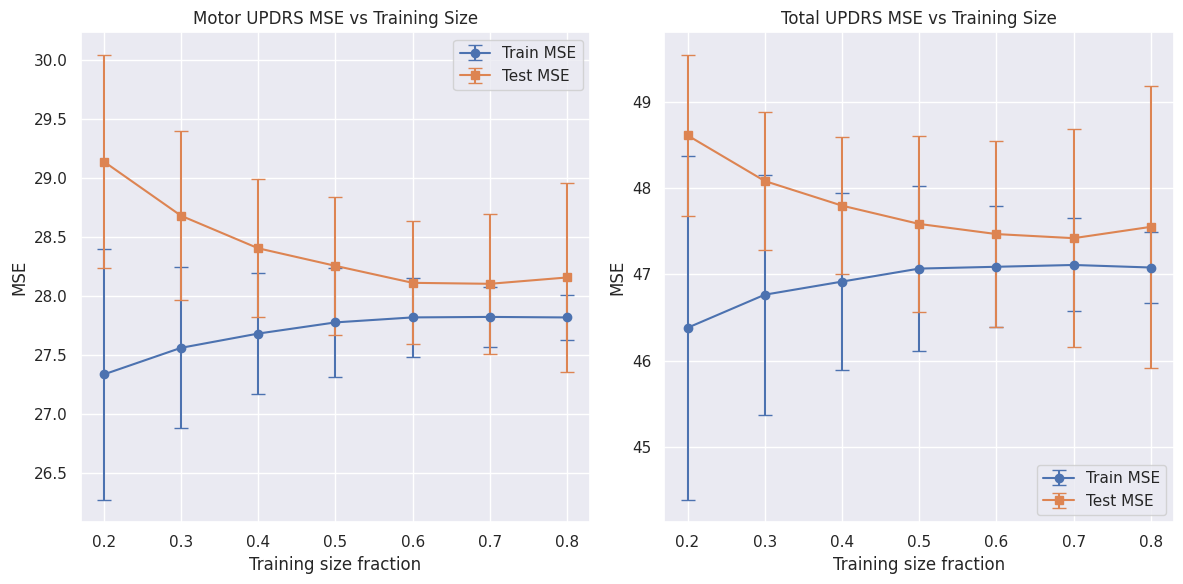



B. Growing subsets of training data for Logistic Regression model on the Breast Cancer Diagnostic Dataset.


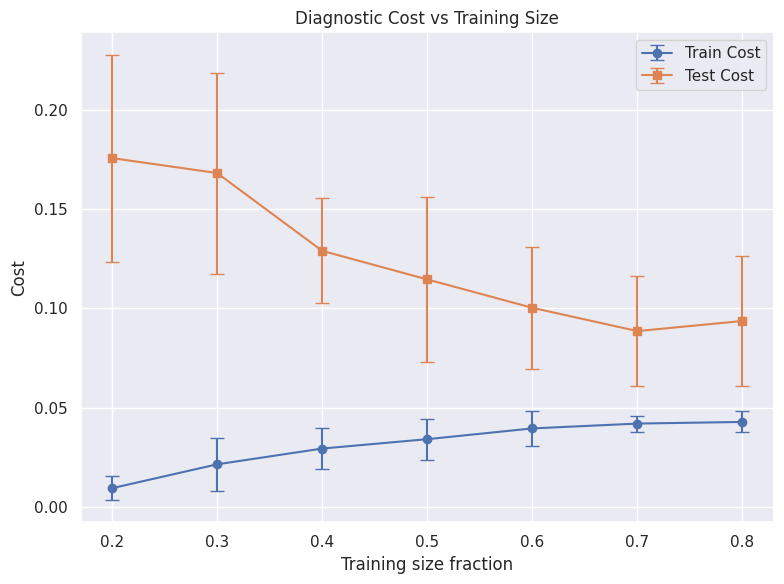

In [ ]:
# Experiment 3
print("--- EXPERIMENT 3 ---")
print("\nTASK: Sample growing subsets of the training data (20%, 30%, . . . , 80%). Observe and explain how the \nsize of thetraining data affects the performance for both models. Plot two curves as a function of training \nsize, one for performance on the training set and one for the test set. Include confidence intervals or \nerror bars obtained from multiple runs to capture variability.")

training_sizes = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

# PART A - Growing subsets of training data on the Linear Regression with the Parkinsons Telemonitoring dataset

print("\n\nA. Growing subsets of training data for Linear Regression model on the Parkinsons Telemonitoring Dataset.")
n_runs = 50  # number of repeated experiments

results_train = []
results_test = []

for frac in training_sizes:
    mse_train_motor, mse_train_total = [], []
    mse_test_motor, mse_test_total = [], []

    for seed in range(n_runs):
        X_train, X_test, y_train, y_test = train_test_split(PT_X, PT_y, test_size=1-frac, random_state=seed)
        model = LinearRegression()
        # Train the model on the training data
        model.fit(X_train, y_train)

        # Report performance on Training set
        y_train_pred = model.predict(X_train)
        mse_train = model.meanSquareErrorLoss(y_train, y_train_pred)
        mse_train_motor.append(mse_train[0])
        mse_train_total.append(mse_train[1])

        # Report performance on Test set
        y_test_pred = model.predict(X_test)
        mse_test = model.meanSquareErrorLoss(y_test, y_test_pred)
        mse_test_motor.append(mse_test[0])
        mse_test_total.append(mse_test[1])

    results_train.append({
        "train_size": frac,
        "motor_mean": np.mean(mse_train_motor),
        "motor_std": np.std(mse_train_motor),
        "total_mean": np.mean(mse_train_total),
        "total_std": np.std(mse_train_total),
    })

    results_test.append({
        "train_size": frac,
        "motor_mean": np.mean(mse_test_motor),
        "motor_std": np.std(mse_test_motor),
        "total_mean": np.mean(mse_test_total),
        "total_std": np.std(mse_test_total),
    })

train_df = pd.DataFrame(results_train)
test_df = pd.DataFrame(results_test)

# Set up figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

results = [('motor', 'Motor'), ('total', 'Total')]
for i, (result, name) in enumerate(results):
  axes[i].errorbar(train_df["train_size"], train_df[f"{result}_mean"], yerr=train_df[f"{result}_std"], label="Train MSE", marker="o", capsize=5)
  axes[i].errorbar(test_df["train_size"], test_df[f"{result}_mean"], yerr=test_df[f"{result}_std"], label="Test MSE", marker="s", capsize=5)
  axes[i].set_title(f"{name} UPDRS MSE vs Training Size")
  axes[i].set_xlabel("Training size fraction")
  axes[i].set_ylabel("MSE")
  axes[i].legend()
  axes[i].grid(True)

plt.tight_layout()
plt.show()

# --------------------------

# PART B - Growing subsets of training data on the Logistic Regression with the Breast Cancer Diagnostic dataset
print("\n\nB. Growing subsets of training data for Logistic Regression model on the Breast Cancer Diagnostic Dataset.")
results_train = []
results_test = []

for frac in training_sizes:
  cost_train_diagnostic = []
  cost_test_diagnostic = []

  for seed in range(10):
    X_train, X_test, y_train, y_test = train_test_split(BCD_X, BCD_y, test_size=1-frac, random_state=seed)
    optimizer = GradientDescent()
    model = LogisticRegression()
    # Train the model on the training data
    model.fit(X_train, y_train, optimizer)

    # Report performance on Training set
    cost_train = model.cost_fn(X_train, y_train)
    cost_train_diagnostic.append(cost_train)

    # Report performance on Test set
    cost_test = model.cost_fn(X_test, y_test)
    cost_test_diagnostic.append(cost_test)

  results_train.append({"train_size": frac, "cost_mean": np.mean(cost_train_diagnostic), "cost_std": np.std(cost_train_diagnostic)})

  results_test.append({"train_size": frac, "cost_mean": np.mean(cost_test_diagnostic), "cost_std": np.std(cost_test_diagnostic)})

train_df = pd.DataFrame(results_train)
test_df = pd.DataFrame(results_test)

# Set up plot

plt.figure(figsize=(8, 6))
plt.errorbar(train_df["train_size"], train_df["cost_mean"], yerr=train_df["cost_std"], label="Train Cost", marker="o", capsize=5)
plt.errorbar(test_df["train_size"], test_df["cost_mean"], yerr=test_df["cost_std"], label="Test Cost", marker="s", capsize=5)
plt.title("Diagnostic Cost vs Training Size")
plt.xlabel("Training size fraction")
plt.ylabel("Cost")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Experiment 4 - Growing Mini-batch sizes

--- EXPERIMENT 4 ---

TASK: For both linear and logistic regression, try out growing minibatch sizes, e.g., 8, 16, 32, 64, and 128. Compare the 
convergence speed and final performance of different batch sizes to the fully batched baseline. Which configuration works the 
best among the ones you tried?


A. Growing minibatch sizes on the Linear Regression model on the Parkinsons Telemonitoring Dataset.


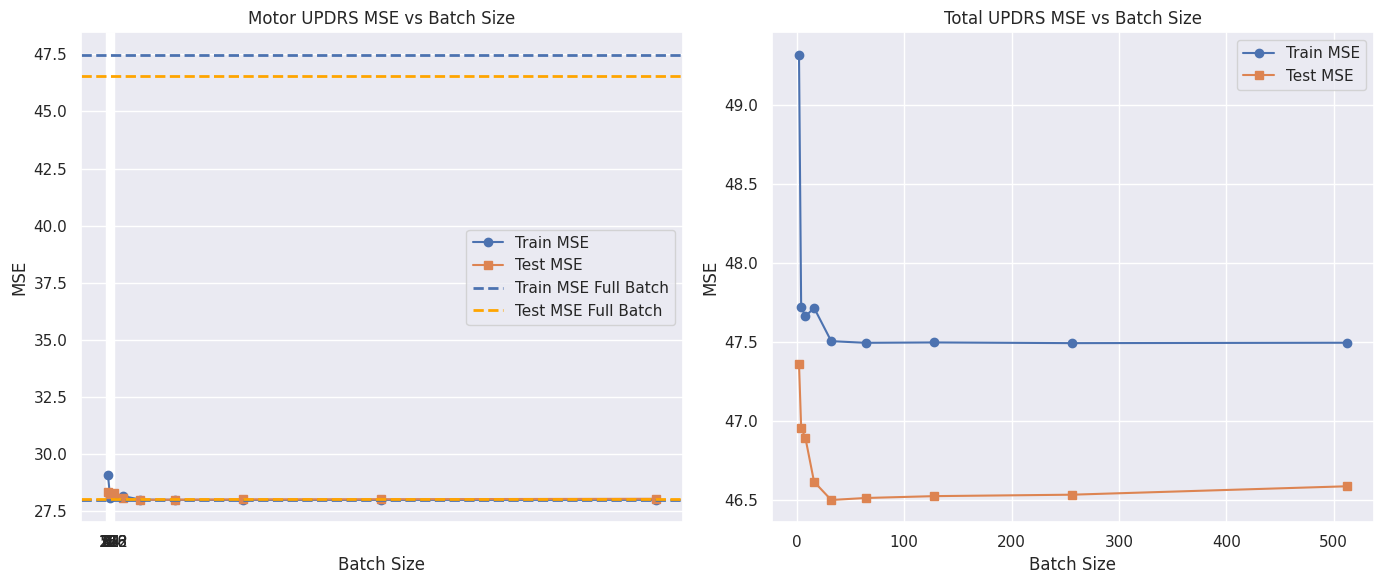

AttributeError: 'DataFrame' object has no attribute 'concat'

In [ ]:
# Experiment 4
print("--- EXPERIMENT 4 ---")
print("\nTASK: For both linear and logistic regression, try out growing minibatch sizes, e.g., 8, 16, 32, 64, and 128. Compare the \nconvergence speed and final performance of different batch sizes to the fully batched baseline. Which configuration works the \nbest among the ones you tried?")

sizes = [2, 4, 8, 16, 32, 64, 128, 256, 512]

# PART A - Growing minibatch sizes on the Linear Regression with the Parkinsons Telemonitoring dataset
print("\n\nA. Growing minibatch sizes on the Linear Regression model on the Parkinsons Telemonitoring Dataset.")
X_train, X_test, y_train, y_test = train_test_split(PT_X, PT_y, test_size=0.2, random_state=42)

mse_test_motor = []
mse_test_total = []
mse_train_motor = []
mse_train_total = []

for size in sizes:
    optimizer = Mini_Batch_SGD(learning_rate=.01, max_iters=1000, batch_size=size)
    model = LinearRegression()
    model.fit(X_train, y_train, optimizer)

    y_test_pred = model.predict(X_test)
    mse_test = model.meanSquareErrorLoss(y_test, y_test_pred)
    mse_test_motor.append(mse_test[0])
    mse_test_total.append(mse_test[1])

    y_train_pred = model.predict(X_train)
    mse_train = model.meanSquareErrorLoss(y_train, y_train_pred)
    mse_train_motor.append(mse_train[0])
    mse_train_total.append(mse_train[1])


# Add fully batched baseline
optimizer_full_batch = Mini_Batch_SGD(learning_rate=.01, max_iters=1000, batch_size=X_train.shape[0]) # batch size equals training size for full batch
model_full_batch = LinearRegression()
model_full_batch.fit(X_train, y_train, optimizer_full_batch)

y_test_pred = model_full_batch.predict(X_test)
mse_test_full_batch = model.meanSquareErrorLoss(y_test, y_test_pred)

y_train_pred = model_full_batch.predict(X_train)
mse_train_full_batch = model.meanSquareErrorLoss(y_train, y_train_pred)


# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

indices = np.arange(len(sizes))

# Motor UPDRS
axes[0].plot(sizes, mse_train_motor, label="Train MSE", marker="o")
axes[0].plot(sizes, mse_test_motor, label="Test MSE", marker="s")
axes[0].set_xticks(sizes)
axes[0].set_xticklabels(sizes) # Set tick labels explicitly
axes[0].set_title("Motor UPDRS MSE vs Batch Size")
axes[0].set_xlabel("Batch Size")
axes[0].set_ylabel("MSE")

# Add line for analytical solution
axes[0].axhline(y=mse_train_full_batch[0], color='b', linestyle='--', linewidth=2, label='Train MSE Full Batch')
axes[0].axhline(y=mse_test_full_batch[0], color='orange', linestyle='--', linewidth=2, label='Test MSE Full Batch')
axes[0].legend()
axes[0].grid(True)

# Total UPDRS
axes[1].plot(sizes, mse_train_total, label="Train MSE", marker="o")
axes[1].plot(sizes, mse_test_total, label="Test MSE", marker="s")
axes[1].set_xticks(sizes)
axes[1].set_xticklabels(sizes) # Set tick labels explicitly
axes[1].set_title("Total UPDRS MSE vs Batch Size")
axes[1].set_xlabel("Batch Size")
axes[1].set_ylabel("MSE")

# Add line for analytical solution
axes[1].axhline(y=mse_train_full_batch[1], color='b', linestyle='--', linewidth=2, label='Train MSE Full Batch')
axes[1].axhline(y=mse_test_full_batch[1], color='orange', linestyle='--', linewidth=2, label='Test MSE Full Batch')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Display a DataFrame with results for better comparison
results_df = pd.DataFrame({
    'Batch Size': sizes,
    'Motor UPDRS Train MSE': mse_train_motor,
    'Motor UPDRS Test MSE': mse_test_motor,
    'Total UPDRS Train MSE': mse_train_total,
    'Total UPDRS Test MSE': mse_test_total
})
full_batch_results = pd.DataFrame({
    'Batch Size': ['full_batch'],
    'Motor UPDRS Train MSE': [mse_train_full_batch[0]],
    'Motor UPDRS Test MSE': [mse_test_full_batch[0]],
    'Total UPDRS Train MSE': [mse_train_full_batch[1]],
    'Total UPDRS Test MSE': [mse_test_full_batch[1]]
})
results_df = pd.concat([results_df, full_batch_results], ignore_index=True)
display(results_df)

# --------------------------

# PART B - Growing minibatch sizes on the Logistic Regression with the Breast Cancer Diagnostic dataset
print("\n\nB. Growing minibatch sizes on the Logistic Regression model on the Breast Cancer Diagnostic Dataset.")

bcd_X_train, bcd_X_test, bcd_y_train, bcd_y_test = train_test_split(BCD_X, BCD_y, test_size=0.2, random_state=42)

cost_test_diagnostic = []
cost_train_diagnostic = []

for size in sizes:
    optimizer = Mini_Batch_SGD(learning_rate=.01, max_iters=1000, batch_size=size)
    model = LogisticRegression()
    model.fit(bcd_X_train.values, bcd_y_train.values, optimizer)

    cost_test = model.cost_fn(bcd_X_test.values, bcd_y_test.values)
    cost_test_diagnostic.append(cost_test)

    cost_train = model.cost_fn(bcd_X_train.values, bcd_y_train.values)
    cost_train_diagnostic.append(cost_train)


# Add fully batched baseline
optimizer_full_batch = Mini_Batch_SGD(learning_rate=.01, max_iters=1000, batch_size=bcd_X_train.shape[0]) # batch size equals training size for full batch
model_full_batch = LogisticRegression()
model_full_batch.fit(bcd_X_train.values, bcd_y_train.values, optimizer_full_batch)

cost_test_full = model_full_batch.cost_fn(bcd_X_test.values, bcd_y_test.values)
cost_train_full = model_full_batch.cost_fn(bcd_X_train.values, bcd_y_train.values)

sizes_with_full_batch = sizes + ['full_batch']
cost_test_diagnostic.append(cost_test_full)
cost_train_diagnostic.append(cost_train_full)

# Plotting
plt.figure(figsize=(8, 6))

# Motor UPDRS
plt.plot(sizes_with_full_batch, cost_train_diagnostic, label="Train Cost", marker="o")
plt.plot(sizes_with_full_batch, cost_test_diagnostic, label="Test Cost", marker="s")
plt.title("Diagnostic Cost vs Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Cost")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Display a DataFrame with results for better comparison
bcd_results_df = pd.DataFrame({
    'Batch Size': sizes_with_full_batch,
    'Cost Train Diagnostic': cost_train_diagnostic,
    'Cost Test Diagnostic': cost_test_diagnostic
})
display(bcd_results_df)

## Experiment 5 - Different Learning Rates

--- EXPERIMENT 5 ---

TASK: Present the performance of both linear and logistic regression with at least three different learning rates (your own choice).


A. Different learning rates on the Linear Regression model on the Parkinsons Telemonitoring Dataset.


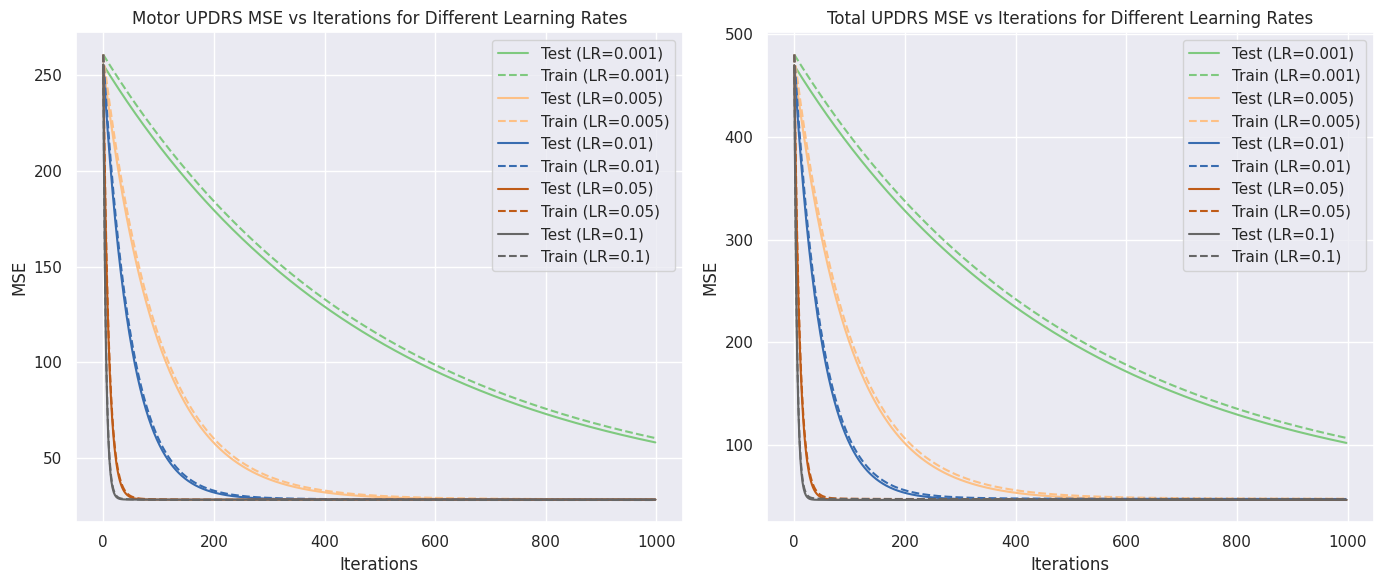



B. Different learning rates on the Logistic Regression model on the Breast Cancer Diagnostic Dataset.


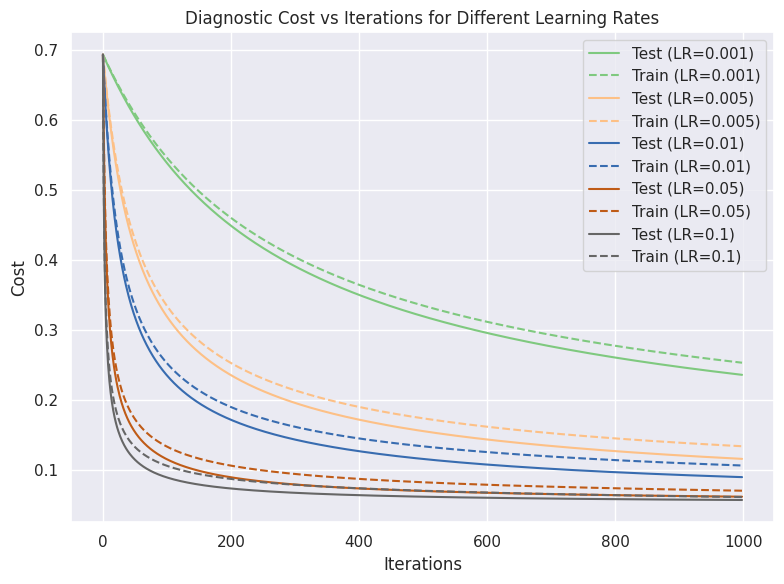

In [ ]:
# Experiment 5
print("--- EXPERIMENT 5 ---")
print("\nTASK: Present the performance of both linear and logistic regression with at least three different learning rates (your own choice).")


# PART A - Different learning rates on the Linear Regression with the Parkinsons Telemonitoring dataset
print("\n\nA. Different learning rates on the Linear Regression model on the Parkinsons Telemonitoring Dataset.")

from collections import defaultdict
import matplotlib.cm as cm
learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1]
colors = cm.Accent(np.linspace(0, 1, len(learning_rates)))

X_train, X_test, y_train, y_test = train_test_split(PT_X, PT_y, test_size=0.2, random_state=42)

mse_test_motor = defaultdict(list)
mse_test_total = defaultdict(list)
mse_train_motor = defaultdict(list)
mse_train_total = defaultdict(list)

for rate in learning_rates:
    optimizer = Mini_Batch_SGD(learning_rate=rate, max_iters=1000, epsilon=1e-20, batch_size=X_train.shape[0], record_history=True)
    model = LinearRegression()
    model.fit(X_train, y_train, optimizer)

    for w in optimizer.w_history:
        y_test_pred = model.predict(X_test, w)
        mse_test = model.meanSquareErrorLoss(y_test, y_test_pred)

        mse_test_motor[rate].append(mse_test[0])
        mse_test_total[rate].append(mse_test[1])

        y_train_pred = model.predict(X_train, w)
        mse_train = model.meanSquareErrorLoss(y_train, y_train_pred)

        mse_train_motor[rate].append(mse_train[0])
        mse_train_total[rate].append(mse_train[1])

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Motor UPDRS MSE over iterations
axes[0].set_title("Motor UPDRS MSE vs Iterations for Different Learning Rates")
axes[0].set_xlabel("Iterations")
axes[0].set_ylabel("MSE")
axes[0].grid(True)
for i, rate in enumerate(learning_rates):
    color = colors[i]
    axes[0].plot(range(len(mse_test_motor[rate])), mse_test_motor[rate], label=f"Test (LR={rate})", color=color)
    axes[0].plot(range(len(mse_train_motor[rate])), mse_train_motor[rate], label=f"Train (LR={rate})", linestyle='--', color=color)
axes[0].legend()

# Total UPDRS MSE over iterations
axes[1].set_title("Total UPDRS MSE vs Iterations for Different Learning Rates")
axes[1].set_xlabel("Iterations")
axes[1].set_ylabel("MSE")
axes[1].grid(True)
for i, rate in enumerate(learning_rates):
    color = colors[i]
    axes[1].plot(range(len(mse_test_total[rate])), mse_test_total[rate], label=f"Test (LR={rate})", color=color)
    axes[1].plot(range(len(mse_train_total[rate])), mse_train_total[rate], label=f"Train (LR={rate})", linestyle='--', color=color)
axes[1].legend()

plt.tight_layout()
plt.show()

# --------------------------

# PART B - Different learning rates on the Logistic Regression with the Breast Cancer Diagnostic dataset
print("\n\nB. Different learning rates on the Logistic Regression model on the Breast Cancer Diagnostic Dataset.")

bcd_X_train, bcd_X_test, bcd_y_train, bcd_y_test = train_test_split(BCD_X, BCD_y, test_size=0.2, random_state=42)

cost_test_diagnostic = defaultdict(list)
cost_train_diagnostic = defaultdict(list)

for rate in learning_rates:
    optimizer = Mini_Batch_SGD(learning_rate=rate, max_iters=1000, epsilon=1e-20, batch_size=bcd_X_train.shape[0], record_history=True)
    model = LogisticRegression()
    model.fit(bcd_X_train.values, bcd_y_train.values, optimizer)

    for w in optimizer.w_history:
        model.w = w
        cost_test = model.cost_fn(bcd_X_test.values, bcd_y_test.values)
        cost_test_diagnostic[rate].append(cost_test)

        cost_train = model.cost_fn(bcd_X_train.values, bcd_y_train.values)
        cost_train_diagnostic[rate].append(cost_train)

# Plotting
plt.figure(figsize=(8, 6))
plt.title("Diagnostic Cost vs Iterations for Different Learning Rates")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
for i, rate in enumerate(learning_rates):
    color = colors[i]
    plt.plot(range(len(cost_test_diagnostic[rate])), cost_test_diagnostic[rate], label=f"Test (LR={rate})", color=color)
    plt.plot(range(len(cost_train_diagnostic[rate])), cost_train_diagnostic[rate], linestyle ="--", label=f"Train (LR={rate})", color=color)
plt.legend()
plt.tight_layout()
plt.show()

## Experiment 6 - Analytical Lin Reg vs Mini-batch SGD

--- EXPERIMENT 6 ---

TASK: Compare analytical linear regression solution with mini-batch stochastic gradient descent based linear regression solution. What do you find?


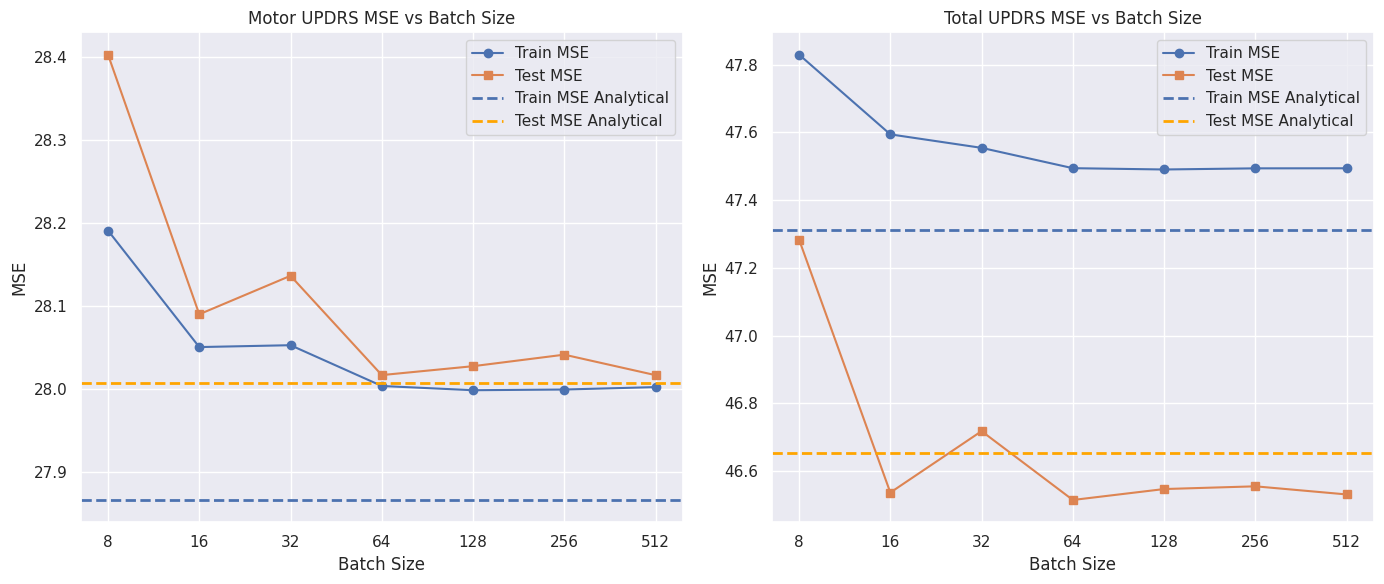

,Batch Size,Motor UPDRS Train MSE,Motor UPDRS Test MSE,Total UPDRS Train MSE,Total UPDRS Test MSE
0,8,28.190583,28.402492,47.829487,47.283397
1,16,28.050230,28.089726,47.593976,46.536317
2,32,28.052473,28.136085,47.554135,46.717701
3,64,28.003362,28.016485,47.494118,46.514432
4,128,27.998253,28.027203,47.490279,46.546721
5,256,27.999101,28.041081,47.493633,46.554763
6,512,28.002018,28.016404,47.493850,46.530794


In [ ]:
# Experiment 6
print("--- EXPERIMENT 6 ---")
print("\nTASK: Compare analytical linear regression solution with mini-batch stochastic gradient descent based linear regression solution. What do you find?")


# From the results in experiment 6, the best results for Mini-batch SGD was in mini batch sizes in the range of 8-512

sizes = [8, 16, 32, 64, 128, 256, 512]

X_train, X_test, y_train, y_test = train_test_split(PT_X, PT_y, test_size=0.2, random_state=42)

mse_test_motor = []
mse_test_total = []
mse_train_motor = []
mse_train_total = []

for size in sizes:
    optimizer = Mini_Batch_SGD(learning_rate=.01, max_iters=1000, batch_size=size)
    model = LinearRegression()
    model.fit(X_train, y_train, optimizer)

    y_test_pred = model.predict(X_test)
    mse_test = model.meanSquareErrorLoss(y_test, y_test_pred)
    mse_test_motor.append(mse_test[0])
    mse_test_total.append(mse_test[1])

    y_train_pred = model.predict(X_train)
    mse_train = model.meanSquareErrorLoss(y_train, y_train_pred)
    mse_train_motor.append(mse_train[0])
    mse_train_total.append(mse_train[1])


# Compute the Analytical solution
model = LinearRegression()
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
mse_test_analytical = model.meanSquareErrorLoss(y_test, y_test_pred)

y_train_pred = model.predict(X_train)
mse_train_analytical = model.meanSquareErrorLoss(y_train, y_train_pred)


# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

indices = np.arange(len(sizes))

# Motor UPDRS
axes[0].plot(indices, mse_train_motor, label="Train MSE", marker="o")
axes[0].plot(indices, mse_test_motor, label="Test MSE", marker="s")
axes[0].set_xticks(indices, sizes)
axes[0].set_title("Motor UPDRS MSE vs Batch Size")
axes[0].set_xlabel("Batch Size")
axes[0].set_ylabel("MSE")

# Add line for analytical solution
axes[0].axhline(y=mse_train_analytical[0], color='b', linestyle='--', linewidth=2, label='Train MSE Analytical')
axes[0].axhline(y=mse_test_analytical[0], color='orange', linestyle='--', linewidth=2, label='Test MSE Analytical')
axes[0].legend()
axes[0].grid(True)



# Total UPDRS
axes[1].plot(indices, mse_train_total, label="Train MSE", marker="o")
axes[1].plot(indices, mse_test_total, label="Test MSE", marker="s")
axes[1].set_xticks(indices, sizes)
axes[1].set_title("Total UPDRS MSE vs Batch Size")
axes[1].set_xlabel("Batch Size")
axes[1].set_ylabel("MSE")

# Add line for analytical solution
axes[1].axhline(y=mse_train_analytical[1], color='b', linestyle='--', linewidth=2, label='Train MSE Analytical')
axes[1].axhline(y=mse_test_analytical[1], color='orange', linestyle='--', linewidth=2, label='Test MSE Analytical')
axes[1].legend()
axes[1].grid(True)


plt.tight_layout()
plt.show()

# Display a DataFrame with results for better comparison
results_df = pd.DataFrame({
    'Batch Size': sizes,
    'Motor UPDRS Train MSE': mse_train_motor,
    'Motor UPDRS Test MSE': mse_test_motor,
    'Total UPDRS Train MSE': mse_train_total,
    'Total UPDRS Test MSE': mse_test_total
})
display(results_df)
